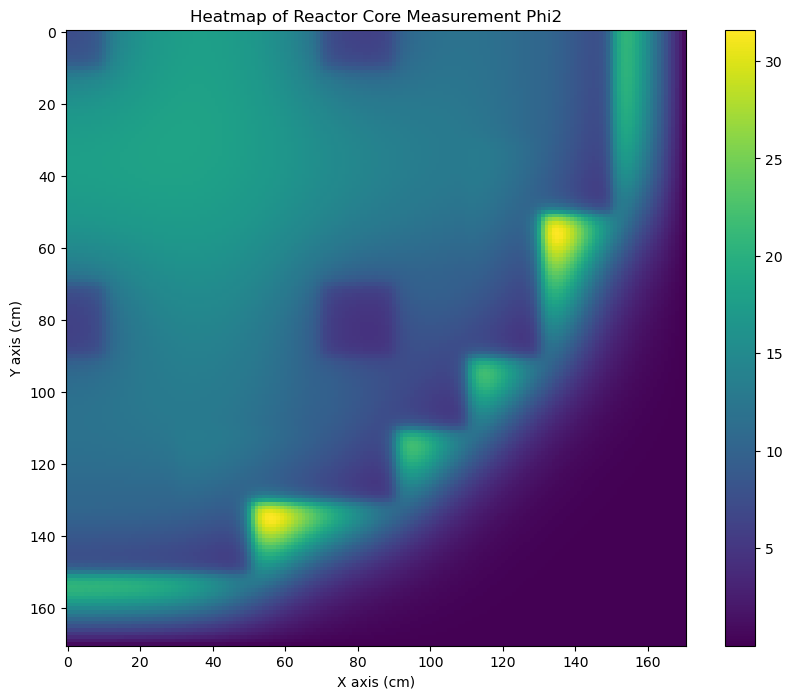

In [21]:
first_matrix1 = data_reshaped1[0].reshape(171, 171)

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(first_matrix1, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Heatmap of Reactor Core Measurement Phi2')
plt.xlabel('X axis (cm)')
plt.ylabel('Y axis (cm)')
plt.show()

## Power Rate From Phi 2

In [92]:
data_path3 = "/Users/waelbenslima/Desktop/data/power1.txt"
data3 = np.loadtxt(data_path3)
data_reshaped3 = data3.reshape((1331, 171, 171))

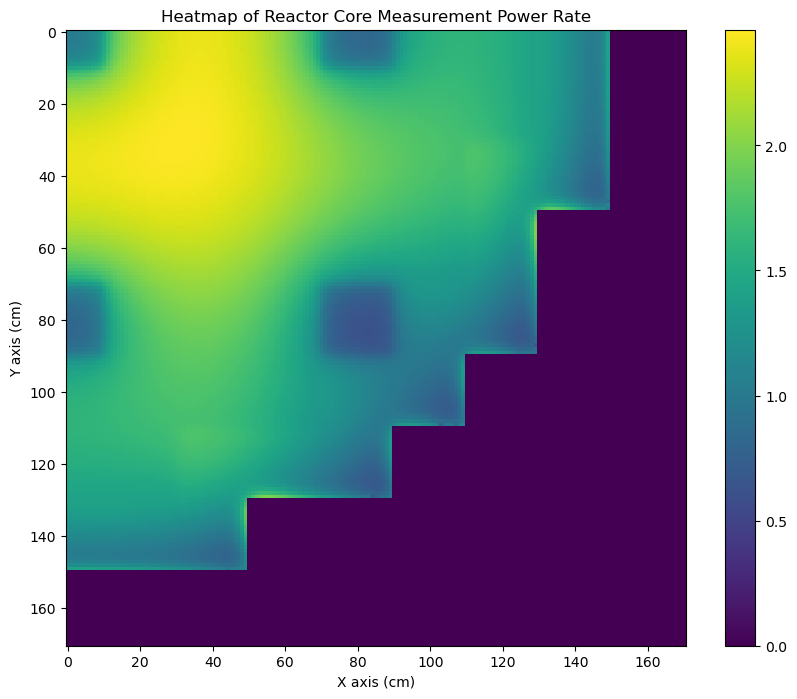

In [94]:
first_matrix3 = data_reshaped3[0].reshape(171, 171)

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(first_matrix3, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title('Heatmap of Reactor Core Measurement Power Rate')
plt.xlabel('X axis (cm)')
plt.ylabel('Y axis (cm)')
plt.show()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 171, 171, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_20             │ (None, 43, 43, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 86, 86, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_21             │ (None, 86, 86, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_12 (UpSampling2D) │ (None, 172, 172, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 172, 172, 1)    │           289 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_2 (Cropping2D)       │ (None, 171, 171, 1)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 766ms/step - loss: 0.0946 - val_loss: 0.0186
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 664ms/step - loss: 0.0165 - val_loss: 0.0063
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 634ms/step - loss: 0.0054 - val_loss: 0.0027
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 614ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 33s 995ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 675ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 639ms/step - loss: 0.0014 - val_loss: 9.9434e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 751ms/step - loss: 9.9170e-04 - val_loss: 0.0011
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - loss: 0.0011 - val_loss: 7.4931e-04
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 613ms/step - loss: 6.9554e-04 - val_loss: 6.5743e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 606ms/step - loss: 6.6972e-04 - val_loss: 6.1487e-04
Epoch 12/20
3

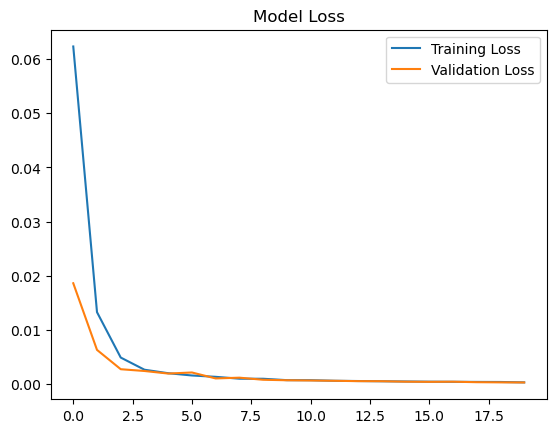

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# Load the data
phi2 = data_reshaped1.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1) for CNN
power = data_reshaped3.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1) for CNN

# Normalize the data
phi2_norm = phi2 / np.max(phi2)
power_norm = power / np.max(power)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(phi2_norm, power_norm, test_size=0.2, random_state=42)

# Define the CNN model
input_shape = (171, 171, 1)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
    layers.Cropping2D(cropping=((0, 1), (0, 1)))  # Crop to match (171, 171)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step


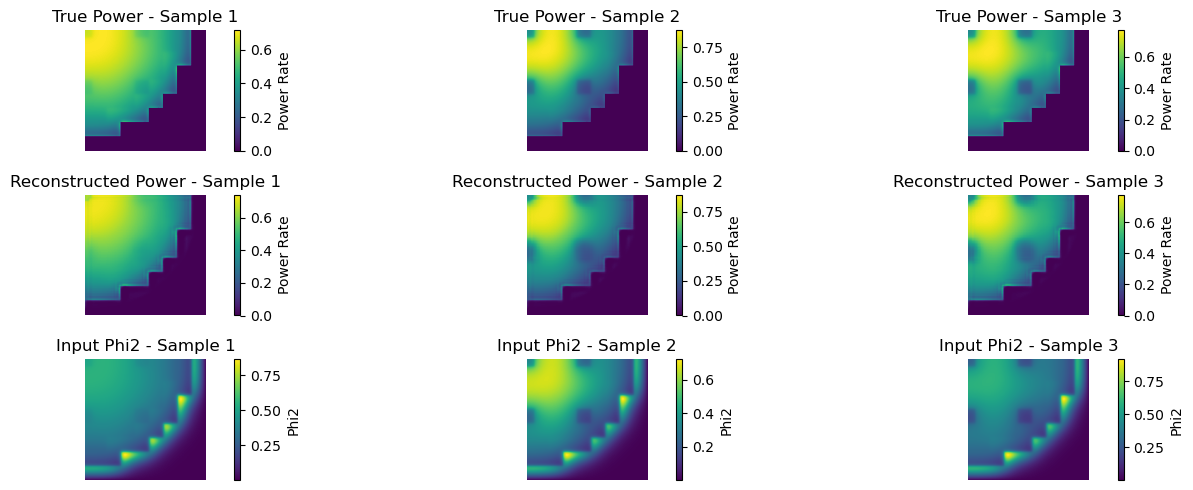

In [98]:
# Predict power rate from phi2
predicted_power = model.predict(X_test)

# Visualize results
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 5))
for i in range(n_samples):
    # True Power Rate
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power Rate')
    plt.title(f'True Power - Sample {i+1}')
    plt.axis('off')

    # Reconstructed Power Rate
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_power[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power Rate')
    plt.title(f'Reconstructed Power - Sample {i+1}')
    plt.axis('off')

    # Input Phi2
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Phi2')
    plt.title(f'Input Phi2 - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [100]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(y_test[0].squeeze(), predicted_power[0].squeeze(), data_range=predicted_power[0].max() - predicted_power[0].min())
print(f"SSIM: {ssim_index}")


RMSE: 0.01570792577269209
L∞ Error: 0.2826393246650696
SSIM: 0.9343570316332098


In [102]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(y_test[0].squeeze(), predicted_power[0].squeeze(), data_range=predicted_power[0].max() - predicted_power[0].min())
print(f"SSIM: {ssim_index}")

# Calculate L2 error
l2_error = np.linalg.norm(y_test - predicted_power)  # Frobenius norm (L2 error)
print(f"L2 Error: {l2_error}")


RMSE: 0.01570792577269209
L∞ Error: 0.2826393246650696
SSIM: 0.9343570316332098
L2 Error: 43.89050536460626


In [104]:
l2_normalized = l2_error / y_test.size
print(f"Normalized L2 Error: {l2_normalized}")


Normalized L2 Error: 5.621692665204488e-06


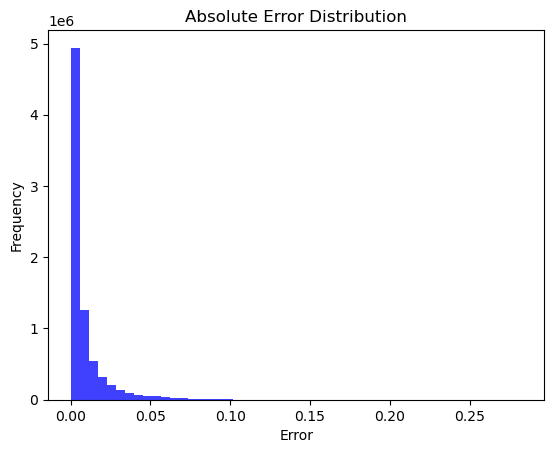

In [106]:
absolute_errors = np.abs(y_test.flatten() - predicted_power.flatten())
plt.hist(absolute_errors, bins=50, alpha=0.75, color='blue')
plt.title("Absolute Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [108]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(y_test[0].squeeze(), predicted_power[0].squeeze(), data_range=predicted_power[0].max() - predicted_power[0].min())
print(f"SSIM: {ssim_index}")

# Calculate L2 error
l2_error = np.linalg.norm(y_test - predicted_power)  # Frobenius norm (L2 error)
print(f"L2 Error: {l2_error}")

# Calculate normalized L2 error
l2_normalized = l2_error / y_test.size
print(f"Normalized L2 Error: {l2_normalized}")

# Calculate relative L2 error
true_l2_norm = np.linalg.norm(y_test)  # L2 norm of the ground truth
relative_l2_error = l2_error / true_l2_norm
print(f"Relative L2 Error: {relative_l2_error}")


RMSE: 0.01570792577269209
L∞ Error: 0.2826393246650696
SSIM: 0.9343570316332098
L2 Error: 43.89050536460626
Normalized L2 Error: 5.621692665204488e-06
Relative L2 Error: 0.0378230737411101


## Let's Try with the Mask Power from Phi 2 

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ phi2_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 171, 171,  │          0 │ phi2_input[0][0], │
│ (Multiply)          │ 1)                │            │ mask_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 171, 171,  │        320 │ multiply_1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_22    │ (None, 86, 86,    │          0 │ conv2d_35[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 86, 86,    │     18,496 │ max_pooling2d_22… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_23    │ (None, 43, 43,    │          0 │ conv2d_36[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_24 │ (None, 43, 43,    │     36,928 │ max_pooling2d_23… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_15    │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_25 │ (None, 86, 86,    │     18,464 │ up_sampling2d_15… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_16    │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 172, 172,  │        289 │ up_sampling2d_16… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d_3        │ (None, 171, 171,  │          0 │ conv2d_37[0][0]   │
│ (Cropping2D)        │ 1)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 930ms/step - loss: 0.0863 - val_loss: 0.0215
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 615ms/step - loss: 0.0197 - val_loss: 0.0153
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 621ms/step - loss: 0.0143 - val_loss: 0.0123
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 589ms/step - loss: 0.0103 - val_loss: 0.0072
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 690ms/step - loss: 0.0064 - val_loss: 0.0050
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 668ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 27s 786ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 766ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 616ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 601ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 705ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23

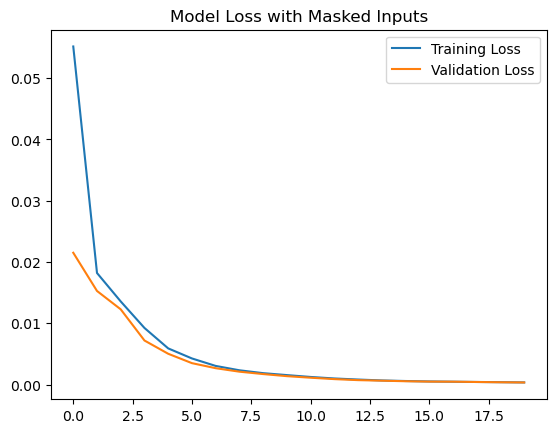

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

# Load data
phi2 = data_reshaped1.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1)
power = data_reshaped3.reshape((1331, 171, 171, 1))  # Shape: (1331, 171, 171, 1)

# Normalize data
phi2_norm = phi2 / np.max(phi2)
power_norm = power / np.max(power)

# Create random masks
def generate_random_mask(shape, sparsity=0.8):
    """
    Generate a binary mask with the given sparsity.
    :param shape: Shape of the mask
    :param sparsity: Fraction of zeros in the mask (default: 0.8)
    :return: Binary mask of the same shape
    """
    mask = np.random.choice([0, 1], size=shape, p=[sparsity, 1 - sparsity])
    return mask

# Apply masks to the phi2 data
masks = np.array([generate_random_mask(phi2_norm[0].shape) for _ in range(len(phi2_norm))])
phi2_masked = phi2_norm * masks

# Split into training and testing sets
X_train, X_test, y_train, y_test, masks_train, masks_test = train_test_split(
    phi2_masked, power_norm, masks, test_size=0.2, random_state=42
)

# Define the CNN model with dimension cropping
input_shape = (171, 171, 1)
mask_input_shape = (171, 171, 1)

phi2_input = layers.Input(shape=input_shape, name="phi2_input")
mask_input = layers.Input(shape=mask_input_shape, name="mask_input")

# Combine masked input
masked_phi2 = layers.Multiply()([phi2_input, mask_input])

# CNN model for reconstruction
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(masked_phi2)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Cropping to handle dimensional mismatch
output = layers.Cropping2D(cropping=((0, 1), (0, 1)))(output)

# Create the model
model = models.Model(inputs=[phi2_input, mask_input], outputs=output)
model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(
    [X_train, masks_train], y_train,
    validation_data=([X_test, masks_test], y_test),
    epochs=20,
    batch_size=32
)

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss with Masked Inputs')
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step


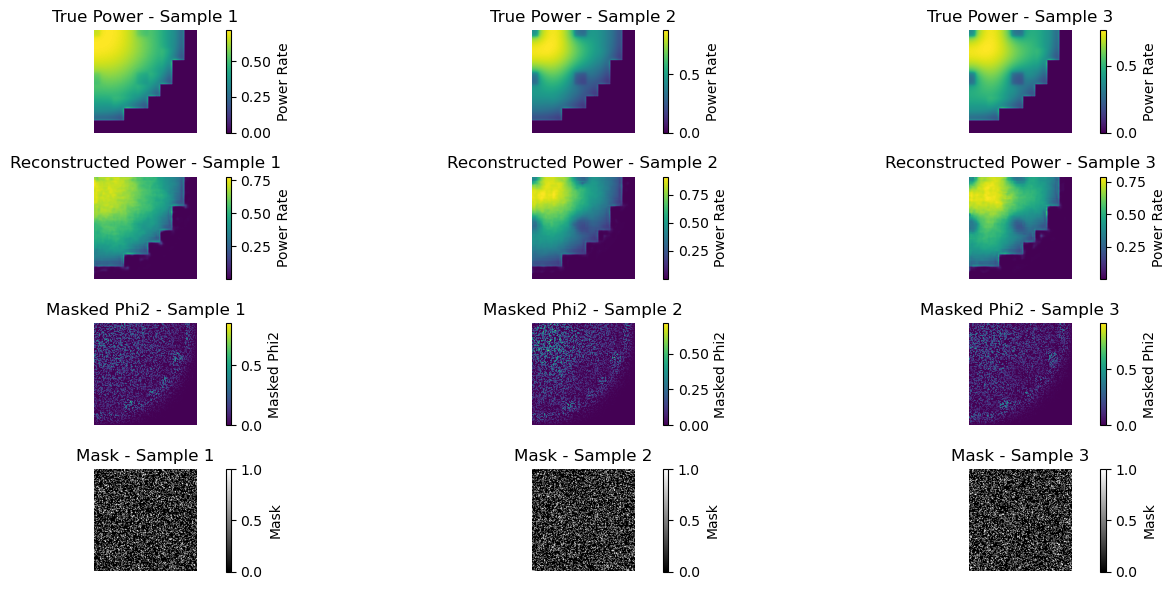

In [116]:
# Predict power rate from masked phi2
predicted_power = model.predict([X_test, masks_test])

# Visualize results
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 6))
for i in range(n_samples):
    # True Power Rate
    plt.subplot(4, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power Rate')
    plt.title(f'True Power - Sample {i+1}')
    plt.axis('off')

    # Reconstructed Power Rate
    plt.subplot(4, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_power[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power Rate')
    plt.title(f'Reconstructed Power - Sample {i+1}')
    plt.axis('off')

    # Input Phi2 (Masked)
    plt.subplot(4, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Masked Phi2')
    plt.title(f'Masked Phi2 - Sample {i+1}')
    plt.axis('off')

    # Mask
    plt.subplot(4, n_samples, i + 1 + 3 * n_samples)
    plt.imshow(masks_test[i].squeeze(), cmap='gray', extent=[0, 171, 0, 171])
    plt.colorbar(label='Mask')
    plt.title(f'Mask - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [120]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Predict power rate from masked phi2
predicted_power = model.predict([X_test, masks_test])

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error (maximum absolute error)
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(
    y_test[0].squeeze(), 
    predicted_power[0].squeeze(), 
    data_range=predicted_power[0].max() - predicted_power[0].min()
)
print(f"SSIM: {ssim_index}")

# Calculate L2 error
l2_error = np.linalg.norm(y_test - predicted_power)
print(f"L2 Error: {l2_error}")

# Calculate Relative L2 Error (as a percentage)
true_l2_norm = np.linalg.norm(y_test)
relative_l2_error = (l2_error / true_l2_norm) * 100  # Convert to percentage
print(f"Relative L2 Error: {relative_l2_error:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step
RMSE: 0.01846851286505587
L∞ Error: 0.48971208930015564
SSIM: 0.8954803375803042
L2 Error: 51.60403574031184
Relative L2 Error: 4.45%


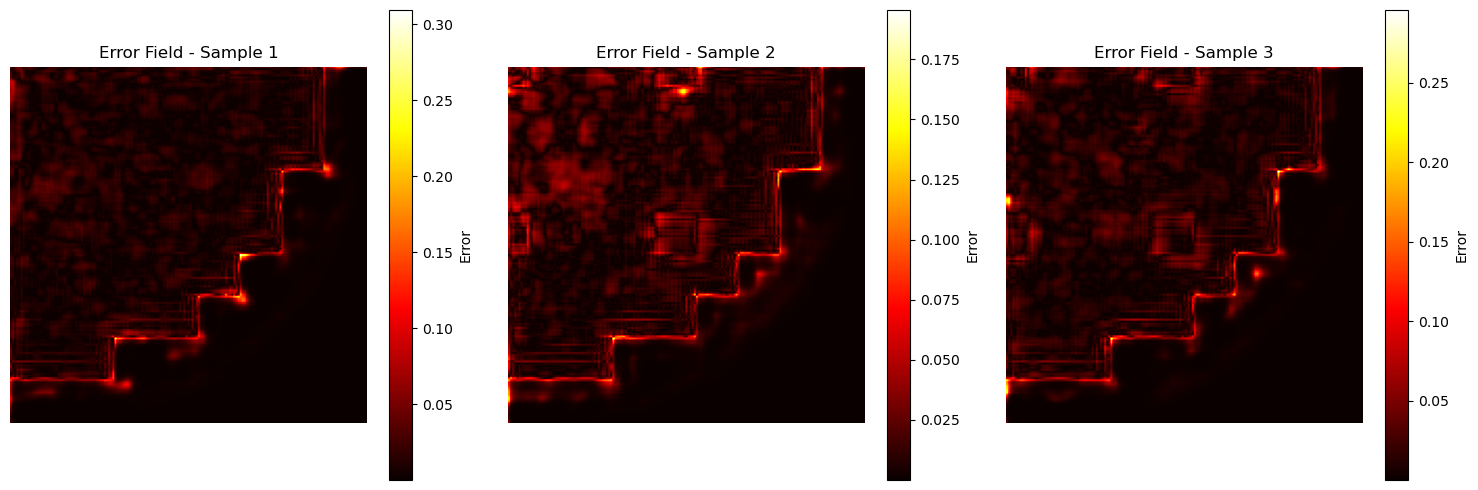

In [126]:
# Visualize error fields for 3 samples
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 5))
for i in range(n_samples):
    # Calculate the error field for each sample
    error_field = np.abs(y_test[i] - predicted_power[i])
    
    # Plot the error field
    plt.subplot(1, n_samples, i + 1)
    plt.imshow(error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Error Field - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()



Improving the model : 

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ phi2_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mask_input          │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 171, 171,  │          0 │ phi2_input[0][0], │
│ (Multiply)          │ 1)                │            │ mask_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 171, 171,  │        320 │ multiply_4[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_27    │ (None, 86, 86,    │          0 │ conv2d_46[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_48 (Conv2D)  │ (None, 86, 86,    │     18,496 │ max_pooling2d_27… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_49 (Conv2D)  │ (None, 86, 86,    │     36,928 │ conv2d_48[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_47 (Conv2D)  │ (None, 86, 86,    │      2,112 │ max_pooling2d_27… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 86, 86,    │          0 │ conv2d_49[0][0],  │
│                     │ 64)               │            │ conv2d_47[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 86, 86,    │          0 │ add_2[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_28    │ (None, 43, 43,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_28 │ (None, 43, 43,    │     36,928 │ max_pooling2d_28… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_19    │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_29 │ (None, 86, 86,    │     18,464 │ up_sampling2d_19… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_20    │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_50 (Conv2D)  │ (None, 172, 172,  │        289 │ up_sampling2d_20… │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cropping2d_5        │ (None, 171, 171,  │          0 │ conv2d_50[0][0] 

 Total params: 113,537 (443.50 KB)

 Trainable params: 113,537 (443.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 914ms/step - loss: 0.0796 - val_loss: 0.0203
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 29s 861ms/step - loss: 0.0183 - val_loss: 0.0165
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 30s 872ms/step - loss: 0.0127 - val_loss: 0.0076
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 941ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - loss: 0.0043 - val_loss: 0.0035
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0031 - val_loss: 0.0031
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - loss: 0.0024 - val_loss: 0.0018
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 31s 919ms/step - loss: 0.0011 - val_loss: 9.8802e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 32s 951ms/step - loss: 9.4537e-04 - val_loss: 7.8021e-04
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1

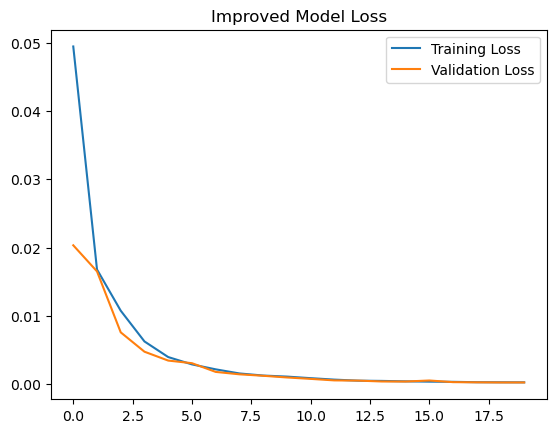

In [133]:
import tensorflow.keras.backend as K

import tensorflow as tf

# Define a weighted MSE loss
def weighted_mse(y_true, y_pred):
    # Compute spatial gradients of the true values (edge detection)
    grad_x, grad_y = tf.image.image_gradients(y_true)
    gradient_magnitude = tf.sqrt(grad_x**2 + grad_y**2)
    
    # Add a small constant to avoid zero weights
    weights = gradient_magnitude + 1.0  # Edge-aware weights
    
    # Weighted MSE loss
    return tf.reduce_mean(weights * tf.square(y_true - y_pred))

# Residual Block
def residual_block(x, filters):
    # Shortcut with 1x1 convolution to match dimensions
    shortcut = layers.Conv2D(filters, (1, 1), activation=None, padding='same')(x)
    
    # Main convolutional path
    x = layers.Conv2D(filters, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(filters, (3, 3), activation=None, padding='same')(x)
    
    # Add shortcut to the main path
    x = layers.Add()([x, shortcut])
    return layers.Activation('relu')(x)


# Define the improved model with dimension cropping
phi2_input = layers.Input(shape=input_shape, name="phi2_input")
mask_input = layers.Input(shape=mask_input_shape, name="mask_input")

# Combine masked input
masked_phi2 = layers.Multiply()([phi2_input, mask_input])

# Residual CNN architecture
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(masked_phi2)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = residual_block(x, 64)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
output = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Cropping to match dimensions
output = layers.Cropping2D(cropping=((0, 1), (0, 1)))(output)

# Create the improved model
improved_model = models.Model(inputs=[phi2_input, mask_input], outputs=output)
improved_model.compile(optimizer='adam', loss=weighted_mse)
improved_model.summary()

# Train the improved model
improved_history = improved_model.fit(
    [X_train, masks_train], y_train,
    validation_data=([X_test, masks_test], y_test),
    epochs=20,
    batch_size=32
)

# Plot training loss
plt.plot(improved_history.history['loss'], label='Training Loss')
plt.plot(improved_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Improved Model Loss')
plt.show()


In [137]:
# Predict power rates using the improved model
improved_predicted_power = improved_model.predict([X_test, masks_test])


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step


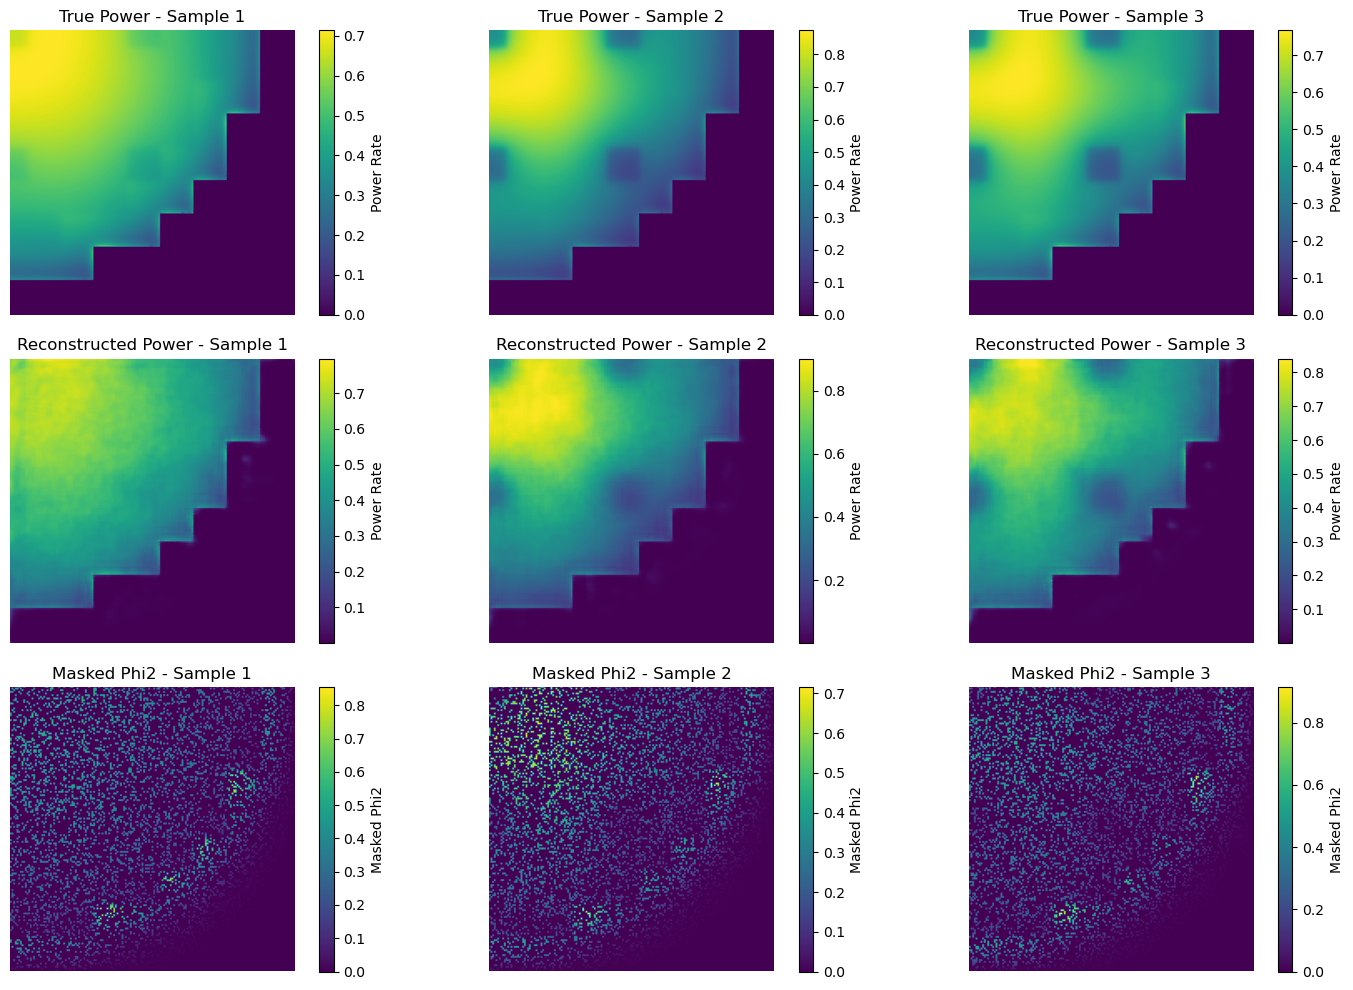

In [139]:
# Visualize reconstructed power fields for the improved model
n_samples = 3  # Number of samples to display
plt.figure(figsize=(15, 10))

for i in range(n_samples):
    # True Power Rate
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power Rate')
    plt.title(f'True Power - Sample {i+1}')
    plt.axis('off')

    # Reconstructed Power Rate
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(improved_predicted_power[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power Rate')
    plt.title(f'Reconstructed Power - Sample {i+1}')
    plt.axis('off')

    # Input Phi2 (Masked)
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(X_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Masked Phi2')
    plt.title(f'Masked Phi2 - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [141]:
# Import necessary metrics
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Calculate metrics for the improved model
improved_rmse = np.sqrt(mean_squared_error(y_test.flatten(), improved_predicted_power.flatten()))
improved_l_inf_error = np.max(np.abs(y_test - improved_predicted_power))
improved_ssim_index = ssim(
    y_test[0].squeeze(),
    improved_predicted_power[0].squeeze(),
    data_range=improved_predicted_power[0].max() - improved_predicted_power[0].min()
)
improved_l2_error = np.linalg.norm(y_test - improved_predicted_power)
true_l2_norm = np.linalg.norm(y_test)
improved_relative_l2_error = (improved_l2_error / true_l2_norm) * 100

# Print results
print(f"Improved RMSE: {improved_rmse}")
print(f"Improved L∞ Error: {improved_l_inf_error}")
print(f"Improved SSIM: {improved_ssim_index}")
print(f"Improved L2 Error: {improved_l2_error}")
print(f"Improved Relative L2 Error: {improved_relative_l2_error:.2f}%")


Improved RMSE: 0.01571621023008842
Improved L∞ Error: 0.46182405948638916
Improved SSIM: 0.925079058117648
Improved L2 Error: 43.91365348913778
Improved Relative L2 Error: 3.78%


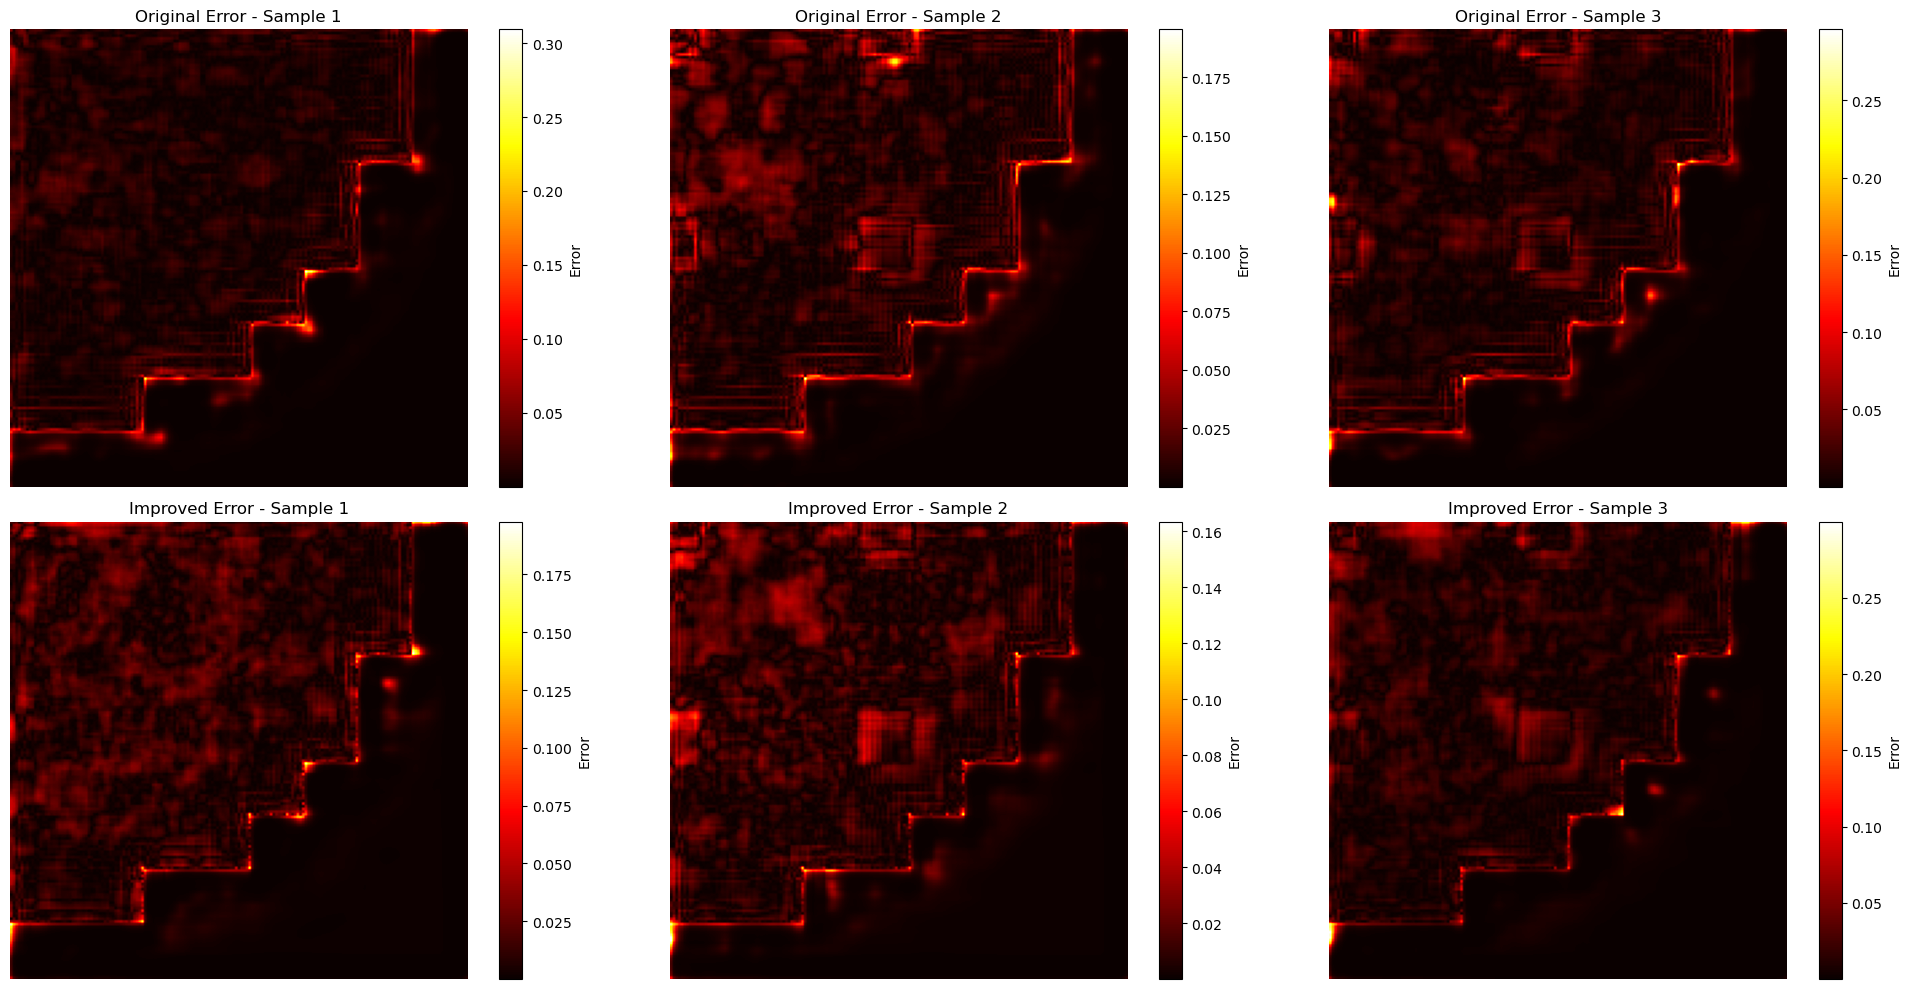

In [143]:
# Compare error fields for original and improved models
n_samples = 3
plt.figure(figsize=(20, 10))

for i in range(n_samples):
    # Original error field
    original_error_field = np.abs(y_test[i] - predicted_power[i])
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(original_error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Original Error - Sample {i+1}')
    plt.axis('off')

    # Improved error field
    improved_error_field = np.abs(y_test[i] - improved_predicted_power[i])
    plt.subplot(2, n_samples, i + 1 + n_samples)
    plt.imshow(improved_error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Improved Error - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Improving using U NET : 

In [186]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the U-Net model
def unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder (Downsampling path)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

    # Bottleneck
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder (Upsampling path)
    u1 = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(c3)
    u1 = layers.UpSampling2D((2, 2))(u1)
    u1 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u1, c2])
    u1 = layers.Concatenate()([u1, c2])

    u2 = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u2 = layers.UpSampling2D((2, 2))(u2)
    u2 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u2, c1])
    u2 = layers.Concatenate()([u2, c1])

    # Output layer with precise cropping
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(u2)
    outputs = layers.Cropping2D(cropping=((0, 0), (0, 0)))(outputs)  # Exact match to 171x171

    # Create the model
    model = models.Model(inputs, outputs)
    return model

# Input shape
input_shape = (171, 171, 1)

# Build and compile the U-Net model
unet = unet_model(input_shape)
unet.compile(optimizer='adam', loss='mse')
unet.summary()


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_176 (Conv2D) │ (None, 171, 171,  │        320 │ input_layer_23[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_177 (Conv2D) │ (None, 171, 171,  │      9,248 │ conv2d_176[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_67    │ (None, 86, 86,    │          0 │ conv2d_177[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_178 (Conv2D) │ (None, 86, 86,    │     18,496 │ max_pooling2d_67… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_179 (Conv2D) │ (None, 86, 86,    │     36,928 │ conv2d_178[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_68    │ (None, 43, 43,    │          0 │ conv2d_179[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_180 (Conv2D) │ (None, 43, 43,    │     73,856 │ max_pooling2d_68… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_181 (Conv2D) │ (None, 43, 43,    │    147,584 │ conv2d_180[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_53 │ (None, 43, 43,    │     73,792 │ conv2d_181[0][0]  │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_27    │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_12 (Lambda)  │ (None, 86, 86,    │          0 │ up_sampling2d_27… │
│                     │ 64)               │            │ conv2d_179[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 86, 86,    │          0 │ lambda_12[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_179[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_54 │ (None, 86, 86,    │     36,896 │ concatenate_14[0… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_28    │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_13 (Lambda)  │ (None, 171, 171,  │          0 │ up_sampling2d_28… │
│                     │ 32)               │            │ conv2d_177[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 171, 171,  │          0 │ lambda_13[0][0],

 Total params: 397,697 (1.52 MB)

 Trainable params: 397,697 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [188]:
history = unet.fit(
    masked_X_train, y_train,  # Input: masked phi2, Output: power
    validation_data=(masked_X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 117s 3s/step - loss: 0.0750 - val_loss: 0.0219
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - loss: 0.0134 - val_loss: 0.0040
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - loss: 0.0032 - val_loss: 0.0021
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 0.0018 - val_loss: 0.0011
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 0.0012 - val_loss: 7.5449e-04
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 7.6440e-04 - val_loss: 8.3855e-04
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - loss: 6.2874e-04 - val_loss: 4.1474e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - loss: 4.3117e-04 - val_loss: 4.7483e-04
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - loss: 3.0941e-04 - val_loss: 2.6106e-04
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - loss: 4.4634e-04 - val_loss: 2.9501e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - loss: 2.1132e-04 - val_loss: 1.3332e-04
Epoch 12/20
34/34 ━

In [190]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Predict on the test set
predicted_power = unet.predict(masked_X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error (maximum absolute error)
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(
    y_test[0].squeeze(), 
    predicted_power[0].squeeze(), 
    data_range=predicted_power[0].max() - predicted_power[0].min()
)
print(f"SSIM: {ssim_index}")

# Calculate Relative L2 Error
true_l2_norm = np.linalg.norm(y_test)
predicted_l2_norm = np.linalg.norm(predicted_power)
relative_l2_error = np.linalg.norm(y_test - predicted_power) / true_l2_norm
print(f"Relative L2 Error: {relative_l2_error:.2%}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 527ms/step
RMSE: 0.008279867186607092
L∞ Error: 0.30358108117015614
SSIM: 0.9834142960707757
Relative L2 Error: 1.99%


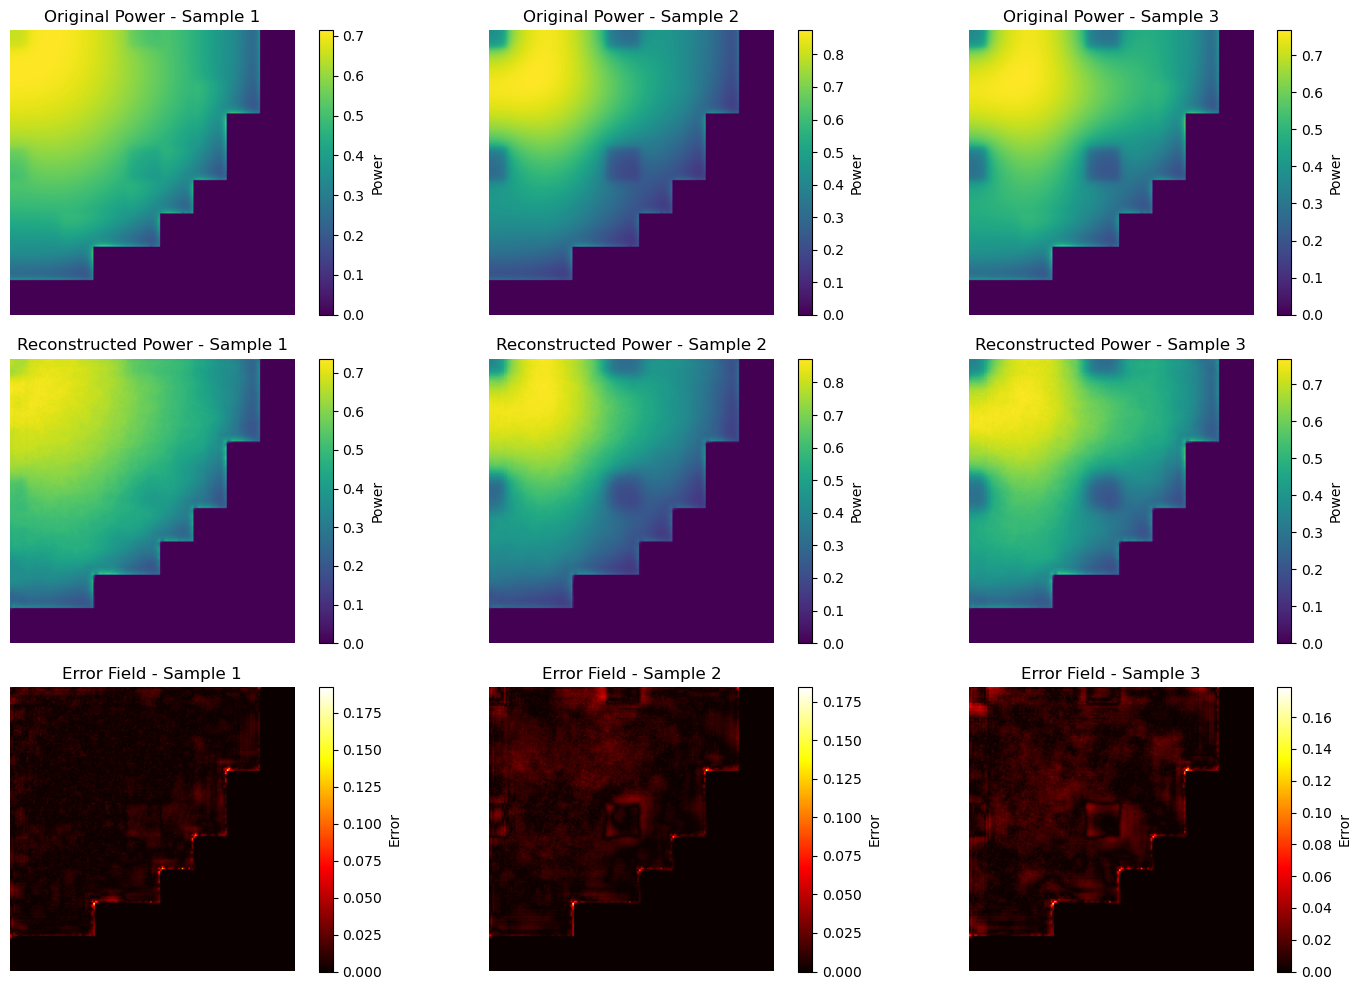

In [192]:
import matplotlib.pyplot as plt

n_samples = 3  # Number of samples to visualize
plt.figure(figsize=(15, 10))

for i in range(n_samples):
    # Original
    plt.subplot(3, n_samples, i + 1)
    plt.imshow(y_test[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power')
    plt.title(f'Original Power - Sample {i+1}')
    plt.axis('off')

    # Reconstructed
    plt.subplot(3, n_samples, i + 1 + n_samples)
    plt.imshow(predicted_power[i].squeeze(), cmap='viridis', extent=[0, 171, 0, 171])
    plt.colorbar(label='Power')
    plt.title(f'Reconstructed Power - Sample {i+1}')
    plt.axis('off')

    # Error Field
    error_field = np.abs(y_test[i] - predicted_power[i])
    plt.subplot(3, n_samples, i + 1 + 2 * n_samples)
    plt.imshow(error_field.squeeze(), cmap='hot', extent=[0, 171, 0, 171])
    plt.colorbar(label='Error')
    plt.title(f'Error Field - Sample {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Improving : using a deeper U Net Architecture 

In [197]:
import tensorflow as tf
from tensorflow.keras import layers, models

def deep_unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder (Downsampling path)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder (Upsampling path)
    u1 = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(c3)
    u1 = layers.UpSampling2D((2, 2))(u1)
    u1 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u1, c2])  # Resize to match
    u1 = layers.Concatenate()([u1, c2])

    u2 = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u2 = layers.UpSampling2D((2, 2))(u2)
    u2 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u2, c1])  # Resize to match
    u2 = layers.Concatenate()([u2, c1])

    # Output layer with precise cropping
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(u2)
    outputs = layers.Cropping2D(cropping=((0, 0), (0, 0)))(outputs)  # Exact match to 171x171

    # Create the model
    model = models.Model(inputs, outputs)
    return model

# Input shape
input_shape = (171, 171, 1)

# Build and compile the deeper U-Net model
deep_unet = deep_unet_model(input_shape)
deep_unet.compile(optimizer='adam', loss='mse')
deep_unet.summary()


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_25      │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_195 (Conv2D) │ (None, 171, 171,  │        320 │ input_layer_25[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_196 (Conv2D) │ (None, 171, 171,  │      9,248 │ conv2d_195[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_73    │ (None, 86, 86,    │          0 │ conv2d_196[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_197 (Conv2D) │ (None, 86, 86,    │     18,496 │ max_pooling2d_73… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_198 (Conv2D) │ (None, 86, 86,    │     36,928 │ conv2d_197[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_74    │ (None, 43, 43,    │          0 │ conv2d_198[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_199 (Conv2D) │ (None, 43, 43,    │     73,856 │ max_pooling2d_74… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_200 (Conv2D) │ (None, 43, 43,    │    147,584 │ conv2d_199[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_57 │ (None, 43, 43,    │     73,792 │ conv2d_200[0][0]  │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_31    │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_14 (Lambda)  │ (None, 86, 86,    │          0 │ up_sampling2d_31… │
│                     │ 64)               │            │ conv2d_198[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_18      │ (None, 86, 86,    │          0 │ lambda_14[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_198[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_58 │ (None, 86, 86,    │     36,896 │ concatenate_18[0… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_32    │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_15 (Lambda)  │ (None, 171, 171,  │          0 │ up_sampling2d_32… │
│                     │ 32)               │            │ conv2d_196[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_19      │ (None, 171, 171,  │          0 │ lambda_15[0][0],

 Total params: 397,697 (1.52 MB)

 Trainable params: 397,697 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [199]:
history = deep_unet.fit(
    masked_X_train, y_train,  # Input: masked phi2, Output: power
    validation_data=(masked_X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - loss: 0.0770 - val_loss: 0.0124
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0102 - val_loss: 0.0046
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - loss: 0.0034 - val_loss: 0.0018
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - loss: 0.0013 - val_loss: 0.0011
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - loss: 0.0010 - val_loss: 7.7202e-04
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - loss: 6.8957e-04 - val_loss: 6.4892e-04
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 5.0446e-04 - val_loss: 3.0123e-04
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - loss: 2.9790e-04 - val_loss: 4.1176e-04
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - loss: 2.6825e-04 - val_loss: 2.3507e-04
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - loss: 2.4372e-04 - val_loss: 1.4674e-04
Epoch 12/20
34/34 ━━━━━━━━━━━

In [201]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Predict on the test set
predicted_power = deep_unet.predict(masked_X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error (maximum absolute error)
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(
    y_test[0].squeeze(), 
    predicted_power[0].squeeze(), 
    data_range=predicted_power[0].max() - predicted_power[0].min()
)
print(f"SSIM: {ssim_index}")

# Calculate Relative L2 Error
true_l2_norm = np.linalg.norm(y_test)
relative_l2_error = np.linalg.norm(y_test - predicted_power) / true_l2_norm
print(f"Relative L2 Error: {relative_l2_error:.2%}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 513ms/step
RMSE: 0.012869784986312591
L∞ Error: 0.36257404088974
SSIM: 0.9835309761139432
Relative L2 Error: 3.10%


Problem : Error increased. this leads to say that : 
- Overfitting: More layers in the deeper U-Net can lead to overfitting . 
- Training Time: The deeper network might need more training epochs or additional regularization techniques
- Too Much Complexity: The deeper model might have too many layers, which can cause it to struggle with fine-tuning the reconstruction task

So let's improve : 

In [205]:
import tensorflow as tf
from tensorflow.keras import layers, models

def deep_unet_model(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder (Downsampling path)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2), padding='same')(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2), padding='same')(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)

    # Decoder (Upsampling path)
    u1 = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(c3)
    u1 = layers.UpSampling2D((2, 2))(u1)
    u1 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u1, c2])  # Resize to match
    u1 = layers.Concatenate()([u1, c2])

    u2 = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(u1)
    u2 = layers.UpSampling2D((2, 2))(u2)
    u2 = layers.Lambda(lambda tensors: tf.image.resize(tensors[0], tf.shape(tensors[1])[1:3]))([u2, c1])  # Resize to match
    u2 = layers.Concatenate()([u2, c1])

    # Output layer with precise cropping to ensure the final output is 171x171
    outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(u2)
    outputs = layers.Cropping2D(cropping=((0, 0), (0, 0)))(outputs)  # Exact match to 171x171

    # Create the model
    model = models.Model(inputs, outputs)
    return model

# Input shape
input_shape = (171, 171, 1)

# Build and compile the deeper U-Net model
deep_unet = deep_unet_model(input_shape)
deep_unet.compile(optimizer='adam', loss='mse')
deep_unet.summary()


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_27      │ (None, 171, 171,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_208 (Conv2D) │ (None, 171, 171,  │        320 │ input_layer_27[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_209 (Conv2D) │ (None, 171, 171,  │      9,248 │ conv2d_208[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_77    │ (None, 86, 86,    │          0 │ conv2d_209[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_210 (Conv2D) │ (None, 86, 86,    │     18,496 │ max_pooling2d_77… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_211 (Conv2D) │ (None, 86, 86,    │     36,928 │ conv2d_210[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_78    │ (None, 43, 43,    │          0 │ conv2d_211[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_212 (Conv2D) │ (None, 43, 43,    │     73,856 │ max_pooling2d_78… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_213 (Conv2D) │ (None, 43, 43,    │    147,584 │ conv2d_212[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_61 │ (None, 43, 43,    │     73,792 │ conv2d_213[0][0]  │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_35    │ (None, 86, 86,    │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_16 (Lambda)  │ (None, 86, 86,    │          0 │ up_sampling2d_35… │
│                     │ 64)               │            │ conv2d_211[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 86, 86,    │          0 │ lambda_16[0][0],  │
│ (Concatenate)       │ 128)              │            │ conv2d_211[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_62 │ (None, 86, 86,    │     36,896 │ concatenate_22[0… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_36    │ (None, 172, 172,  │          0 │ conv2d_transpose… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_17 (Lambda)  │ (None, 171, 171,  │          0 │ up_sampling2d_36… │
│                     │ 32)               │            │ conv2d_209[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 171, 171,  │          0 │ lambda_17[0][0],

 Total params: 397,697 (1.52 MB)

 Trainable params: 397,697 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [211]:
from tensorflow.keras.optimizers import Adam

# Create an Adam optimizer with a smaller learning rate
optimizer = Adam(learning_rate=0.0001)

# Compile the model using the new optimizer
deep_unet.compile(optimizer=optimizer, loss='mse')

# Train the model
history = deep_unet.fit(
    masked_X_train, y_train,
    validation_data=(masked_X_test, y_test),
    epochs=20,
    batch_size=32
)


Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - loss: 0.0932 - val_loss: 0.0226
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 102s 3s/step - loss: 0.0189 - val_loss: 0.0123
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - loss: 0.0109 - val_loss: 0.0069
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - loss: 0.0063 - val_loss: 0.0045
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - loss: 0.0046 - val_loss: 0.0041
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - loss: 0.0038 - val_loss: 0.0031
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - loss: 0.0031 - val_loss: 0.0028
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - loss: 0.0027 - val_loss: 0.0024
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - loss: 0.0022 - val_loss: 0.0019
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - loss: 0.0019 - val_loss: 0.0019
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - loss: 0.0017 -

In [218]:
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim
import numpy as np

# Predict on the test set
predicted_power = deep_unet.predict(masked_X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test.flatten(), predicted_power.flatten()))
print(f"RMSE: {rmse}")

# Calculate L∞ error (maximum absolute error)
l_inf_error = np.max(np.abs(y_test - predicted_power))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM for the first sample
ssim_index = ssim(
    y_test[0].squeeze(), 
    predicted_power[0].squeeze(), 
    data_range=predicted_power[0].max() - predicted_power[0].min()
)
print(f"SSIM: {ssim_index}")

# Calculate Relative L2 Error
true_l2_norm = np.linalg.norm(y_test)
relative_l2_error = np.linalg.norm(y_test - predicted_power) / true_l2_norm
print(f"Relative L2 Error: {relative_l2_error:.2%}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step
RMSE: 0.031062930479437798
L∞ Error: 0.5321360764747982
SSIM: 0.8688454570801689
Relative L2 Error: 7.48%


when we increase the number of layers, there is a common problem in deep learning associated with that called the Vanishing/Exploding gradient. So we will use ResNet which stands for Residual Network: In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Blocks. In this network, we use a technique called skip connections. The skip connection connects activations of a  layer to further layers by skipping some layers in between. This forms a residual block. Resnets are made by stacking these residual blocks together. 

Resource : Geeks For Geeks Residual Networks Deep Learning 

## Using Another Model : ResNet -> Residual Network 

## XGBoost Model 

In [245]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.1 MB/s eta 0:00:0000:010:00:01


In [257]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

# Check the shape of the original data
print(f"X_train shape: {X_train.shape}")  # Should be (N_samples, 171*171)
print(f"y_train shape: {y_train.shape}")  # Should be (N_samples, 171, 171, 1)

# Flatten the input data (phi2) to (N_samples, 171*171)
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten to (N_samples, 171*171)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Ensure y_train is reshaped to 2D (N_samples, 171*171)
y_train_flat = y_train.reshape(y_train.shape[0], -1)  # Flatten the power values into (N_samples, 171*171)
y_test_flat = y_test.reshape(y_test.shape[0], -1)  # Flatten the power values into (N_samples, 171*171)

# Verify the shapes after flattening
print(f"X_train_flat shape: {X_train_flat.shape}")  # Should be (N_samples, 171*171)
print(f"y_train_flat shape: {y_train_flat.shape}")  # Should be (N_samples, 171*171)


X_train shape: (851, 29241)
y_train shape: (851, 171, 171, 1)
X_train_flat shape: (851, 29241)
y_train_flat shape: (851, 29241)


In [ ]:
# Train/test split (if you haven't already done it)
X_train, X_val, y_train, y_val = train_test_split(X_train_flat, y_train_flat, test_size=0.2, random_state=42)

# Set up the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                             max_depth=5, alpha=10, n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_flat)

In [ ]:
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_flat, y_pred))
print(f"RMSE: {rmse}")

# Calculate L∞ Error (Maximum absolute error)
l_inf_error = np.max(np.abs(y_test_flat - y_pred))
print(f"L∞ Error: {l_inf_error}")

# Calculate SSIM (Structural Similarity Index) for the first test sample
ssim_index = ssim(y_test[0].reshape(171, 171), y_pred[0].reshape(171, 171), data_range=1)
print(f"SSIM: {ssim_index}")

# Calculate Relative L2 Error
true_l2_norm = np.linalg.norm(y_test_flat)
relative_l2_error = np.linalg.norm(y_test_flat - y_pred) / true_l2_norm
print(f"Relative L2 Error: {relative_l2_error:.2%}")